In [1]:
# from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud
from textblob import TextBlob

In [2]:
# dataset = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_review_All_Beauty", trust_remote_code=True)
# print(dataset["full"][0])
# # convert to pandas
# df = pd.DataFrame(dataset["full"])

In [3]:
# guardamos df en un archivo csv
# df.to_csv("../data/amazon_beauty_reviews.csv", index=False)

In [4]:
# dataset = load_dataset("McAuley-Lab/Amazon-Reviews-2023", "raw_meta_All_Beauty", split="full", trust_remote_code=True)
# print(dataset[0])



In [5]:
# products = pd.DataFrame(dataset)

In [6]:
# products = products.drop(columns=["main_category", "features", "description", "price", "images", "videos", "store", "categories", "details", "bought_together", "subtitle", "author"])

In [7]:
# products.to_csv("../data/amazon_beauty_products.csv", index=False)

In [8]:
products = pd.read_csv("../data/amazon_beauty_products.csv")

In [9]:
products.head()

,title,average_rating,rating_number,parent_asin
0,"Howard LC0008 Leather Conditioner, 8-Ounce (4-...",4.8,10,B01CUPMQZE
1,Yes to Tomatoes Detoxifying Charcoal Cleanser ...,4.5,3,B076WQZGPM
2,Eye Patch Black Adult with Tie Band (6 Per Pack),4.4,26,B000B658RI
3,"Tattoo Eyebrow Stickers, Waterproof Eyebrow, 4...",3.1,102,B088FKY3VD
4,Precision Plunger Bars for Cartridge Grips – 9...,4.3,7,B07NGFDN6G


In [10]:
df = pd.read_csv("../data/amazon_beauty_reviews.csv")

In [11]:
df.head()

,rating,title,text,images,asin,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5.0,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,[],B00YQ6X8EO,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588687728923,0,True
1,4.0,Works great but smells a little weird.,"This product does what I need it to do, I just...",[],B081TJ8YS3,B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588615855070,1,True
2,5.0,Yes!,"Smells good, feels great!",[],B07PNNCSP9,B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,1589665266052,2,True
3,1.0,Synthetic feeling,Felt synthetic,[],B09JS339BZ,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1643393630220,0,True
4,5.0,A+,Love it,[],B08BZ63GMJ,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1609322563534,0,True


In [12]:
# dropeamos la columna images, asin, parent_asin
df = df.drop(columns=["images", "asin"])
df.head()


,rating,title,text,parent_asin,user_id,timestamp,helpful_vote,verified_purchase
0,5.0,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588687728923,0,True
1,4.0,Works great but smells a little weird.,"This product does what I need it to do, I just...",B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,1588615855070,1,True
2,5.0,Yes!,"Smells good, feels great!",B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,1589665266052,2,True
3,1.0,Synthetic feeling,Felt synthetic,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1643393630220,0,True
4,5.0,A+,Love it,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,1609322563534,0,True


In [13]:
print("Dimensiones del DataFrame:", df.shape)

Dimensiones del DataFrame: (701528, 8)


In [14]:
print("Tipos de datos de cada columna:\n", df.dtypes)

Tipos de datos de cada columna:
 rating               float64
title                 object
text                  object
parent_asin           object
user_id               object
timestamp              int64
helpful_vote           int64
verified_purchase       bool
dtype: object


In [15]:
print("Resumen estadístico de las columnas numéricas:\n", df.describe())

Resumen estadístico de las columnas numéricas:
               rating     timestamp   helpful_vote
count  701528.000000  7.015280e+05  701528.000000
mean        3.960245  1.554781e+12       0.923588
std         1.494452  8.005792e+10       5.471391
min         1.000000  9.730527e+11       0.000000
25%         3.000000  1.501616e+12       0.000000
50%         5.000000  1.571595e+12       0.000000
75%         5.000000  1.614647e+12       1.000000
max         5.000000  1.694220e+12     646.000000


In [16]:
# Convertir el timestamp a datetime en formato 'YYYY-MM-DD HH:MM:SS'
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='ms')

In [17]:
# Opcional: Si prefieres solo la fecha sin la hora
df['date'] = df['timestamp'].dt.date

In [18]:
df['rating'] = df['rating'].astype(int)

In [19]:
df.head()

,rating,title,text,parent_asin,user_id,timestamp,helpful_vote,verified_purchase,date
0,5,Such a lovely scent but not overpowering.,This spray is really nice. It smells really go...,B00YQ6X8EO,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2020-05-05 14:08:48.923,0,True,2020-05-05
1,4,Works great but smells a little weird.,"This product does what I need it to do, I just...",B081TJ8YS3,AGKHLEW2SOWHNMFQIJGBECAF7INQ,2020-05-04 18:10:55.070,1,True,2020-05-04
2,5,Yes!,"Smells good, feels great!",B097R46CSY,AE74DYR3QUGVPZJ3P7RFWBGIX7XQ,2020-05-16 21:41:06.052,2,True,2020-05-16
3,1,Synthetic feeling,Felt synthetic,B09JS339BZ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,2022-01-28 18:13:50.220,0,True,2022-01-28
4,5,A+,Love it,B08BZ63GMJ,AFQLNQNQYFWQZPJQZS6V3NZU4QBQ,2020-12-30 10:02:43.534,0,True,2020-12-30


In [20]:
df.isnull().sum()

rating                 0
title                160
text                 212
parent_asin            0
user_id                0
timestamp              0
helpful_vote           0
verified_purchase      0
date                   0
dtype: int64

/tmp/ipykernel_171360/2523081703.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, palette='viridis')


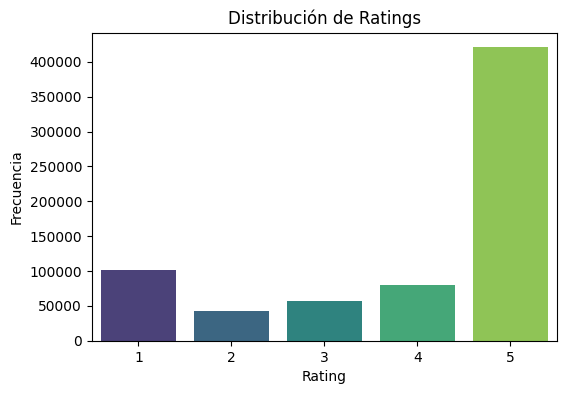

In [21]:
# Distribución de la columna 'rating'
plt.figure(figsize=(6, 4))
sns.countplot(x='rating', data=df, palette='viridis')
plt.title('Distribución de Ratings')
plt.xlabel('Rating')
plt.ylabel('Frecuencia')
plt.show()

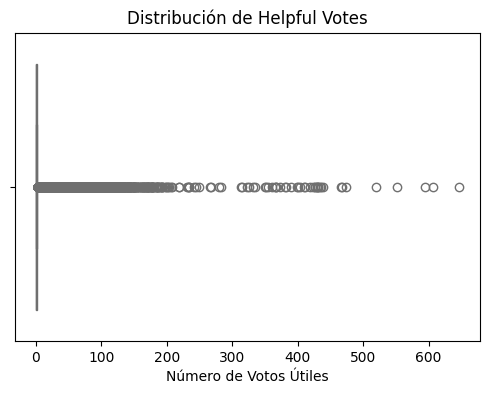

In [22]:
# Boxplot de la distribución de 'helpful_vote'
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['helpful_vote'], color='skyblue')
plt.title('Distribución de Helpful Votes')
plt.xlabel('Número de Votos Útiles')
plt.show()

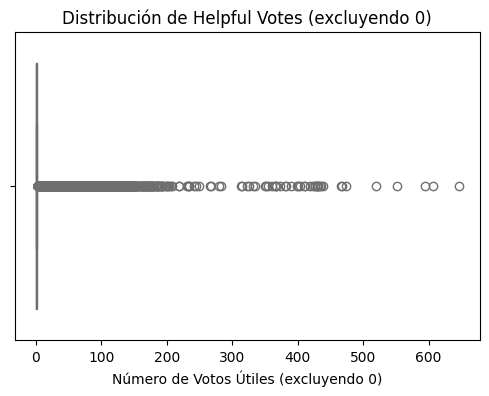

In [23]:
# Boxplot de la distribución de 'helpful_vote' sin incluir los ceros
plt.figure(figsize=(6, 4))
sns.boxplot(x=df['helpful_vote'], color='skyblue')
plt.title('Distribución de Helpful Votes (excluyendo 0)')
plt.xlabel('Número de Votos Útiles (excluyendo 0)')
plt.show()

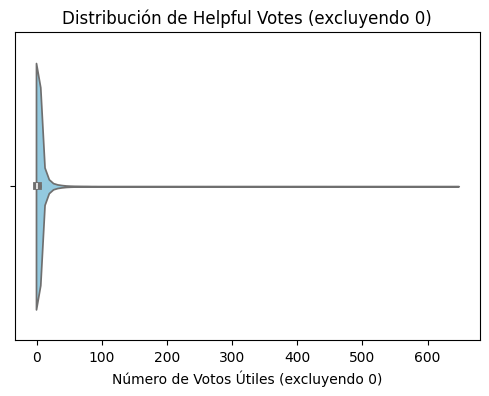

In [24]:
# Gráfico de violín de la distribución de 'helpful_vote' sin incluir los ceros
plt.figure(figsize=(6, 4))
sns.violinplot(x=df[df['helpful_vote'] > 0]['helpful_vote'], color='skyblue')
plt.title('Distribución de Helpful Votes (excluyendo 0)')
plt.xlabel('Número de Votos Útiles (excluyendo 0)')
plt.show()


/tmp/ipykernel_171360/2171359572.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='verified_purchase', data=df, palette='Set2')


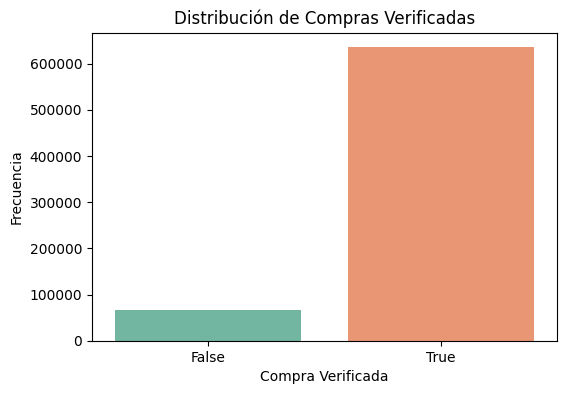

In [25]:
# Distribución de 'verified_purchase'
plt.figure(figsize=(6, 4))
sns.countplot(x='verified_purchase', data=df, palette='Set2')
plt.title('Distribución de Compras Verificadas')
plt.xlabel('Compra Verificada')
plt.ylabel('Frecuencia')
plt.show()


In [26]:
# convertimos df["text"] a string
df["text"] = df["text"].astype(str)

In [27]:
# Longitud de las reseñas
df['text_length'] = df['text'].apply(len)

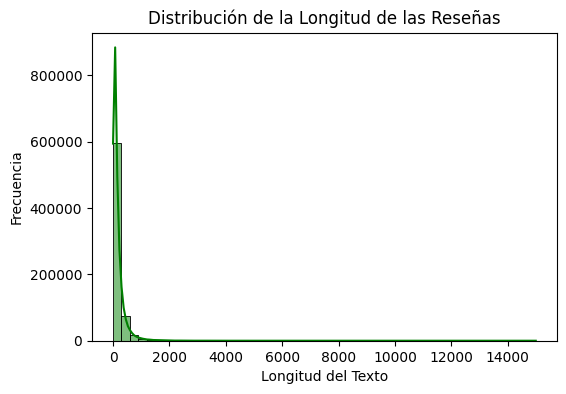

In [28]:
plt.figure(figsize=(6, 4))
sns.histplot(df['text_length'], bins=50, kde=True, color='green')
plt.title('Distribución de la Longitud de las Reseñas')
plt.xlabel('Longitud del Texto')
plt.ylabel('Frecuencia')
plt.show()


In [29]:
all_text = ' '.join(df['text'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

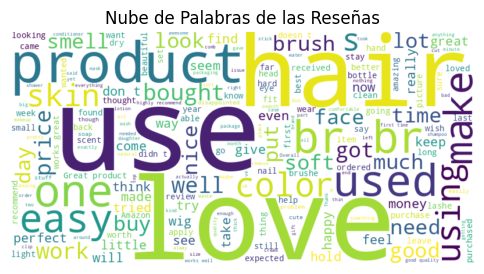

In [30]:
plt.figure(figsize=(6, 3.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras de las Reseñas')
plt.show()

In [31]:
df['sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

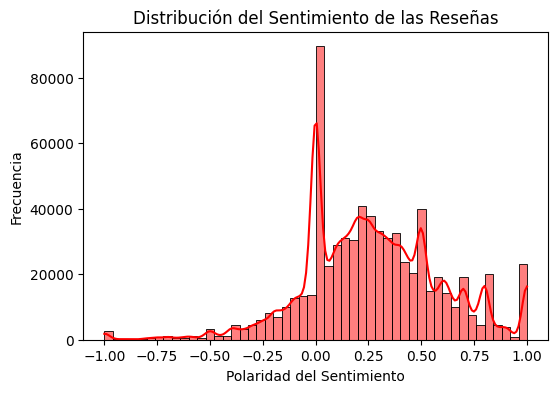

In [32]:
plt.figure(figsize=(6, 4))
sns.histplot(df['sentiment'], bins=50, kde=True, color='red')
plt.title('Distribución del Sentimiento de las Reseñas')
plt.xlabel('Polaridad del Sentimiento')
plt.ylabel('Frecuencia')
plt.show()


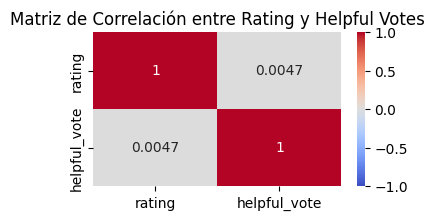

In [33]:
# Calcular la matriz de correlación entre 'rating' y 'helpful_vote'
correlation_matrix = df[['rating', 'helpful_vote']].corr()

# Visualizar la matriz de correlación con un heatmap
plt.figure(figsize=(4, 2))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matriz de Correlación entre Rating y Helpful Votes')
plt.show()

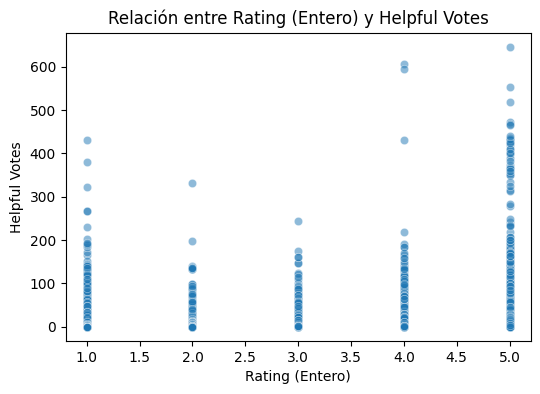

In [34]:
# Gráfico de dispersión entre 'rating' convertido a entero y 'helpful_vote'
plt.figure(figsize=(6, 4))
sns.scatterplot(x=df['rating'], y='helpful_vote', data=df, alpha=0.5)
plt.title('Relación entre Rating (Entero) y Helpful Votes')
plt.xlabel('Rating (Entero)')
plt.ylabel('Helpful Votes')
plt.show()


In [35]:
# Contar el número de reseñas por user_id
reviews_per_user = df['user_id'].value_counts()

# Mostrar los primeros resultados
print(reviews_per_user.head())


user_id
AG73BVBKUOH22USSFJA5ZWL7AKXA      165
AEZP6Z2C5AVQDZAJECQYZWQRNG3Q      146
AEMP3A7IKW37CMWFXNKXWW6HGJHA_1    115
AHDVSLWHSORYGG3S5QZMVDFNOXUQ      108
AGZUJTI7A3JFKB4FP5JOH6NVAJIQ_1     87
Name: count, dtype: int64


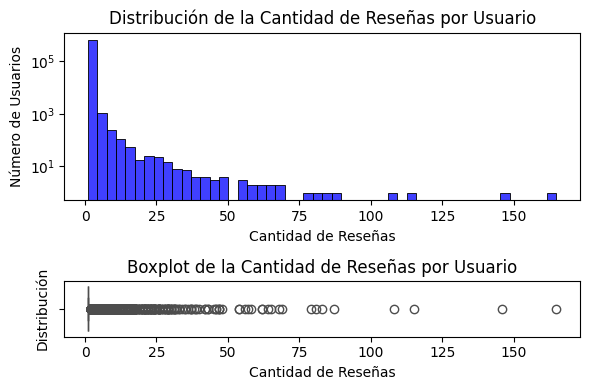

In [36]:
# Crear subplots: 2 filas, 1 columna
fig, axs = plt.subplots(2, 1, figsize=(6, 4), gridspec_kw={'height_ratios': [3, 1]})

# Subplot 1: Histograma de la distribución de reseñas por user_id
sns.histplot(reviews_per_user, bins=50, kde=False, color='blue', ax=axs[0])
axs[0].set_title('Distribución de la Cantidad de Reseñas por Usuario')
axs[0].set_xlabel('Cantidad de Reseñas')
axs[0].set_ylabel('Número de Usuarios')
axs[0].set_yscale('log')  # Escala logarítmica para visualizar mejor

# Subplot 2: Boxplot de la cantidad de reseñas por user_id
sns.boxplot(x=reviews_per_user, color='red', ax=axs[1])
axs[1].set_title('Boxplot de la Cantidad de Reseñas por Usuario')
axs[1].set_xlabel('Cantidad de Reseñas')
axs[1].set_ylabel('Distribución')

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar el gráfico
plt.show()

/tmp/ipykernel_171360/2107475265.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reviews_per_product.head(20).index, y=reviews_per_product.head(20).values, palette='viridis')


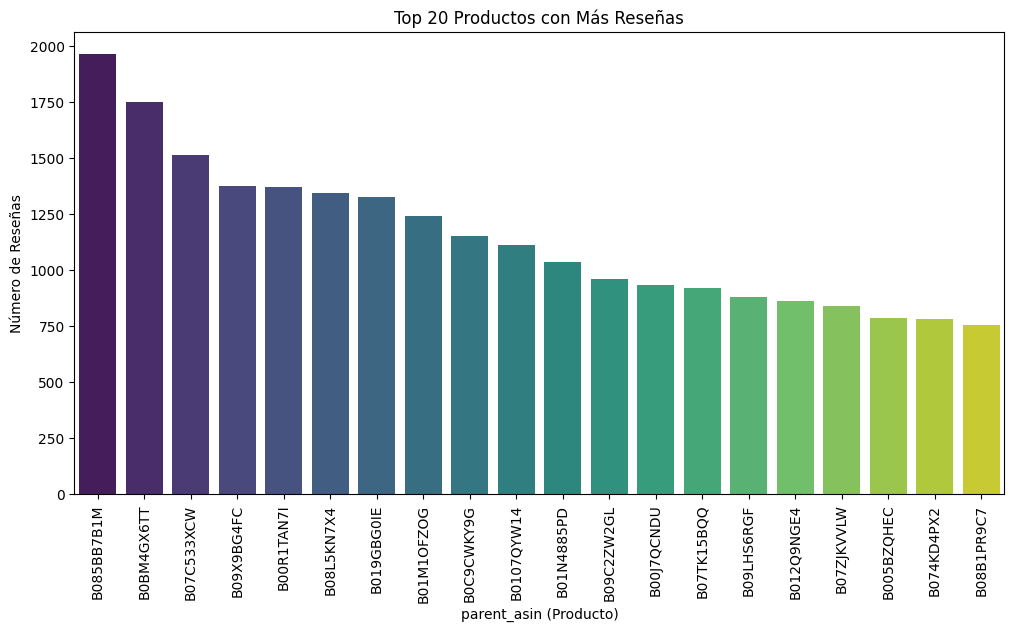

In [53]:
# Contar la cantidad de reseñas por producto (parent_asin)
reviews_per_product = df['parent_asin'].value_counts()

# Visualizar los productos con más reseñas
plt.figure(figsize=(12, 6))
sns.barplot(x=reviews_per_product.head(20).index, y=reviews_per_product.head(20).values, palette='viridis')
plt.title('Top 20 Productos con Más Reseñas')
plt.xlabel('parent_asin (Producto)')
plt.ylabel('Número de Reseñas')
plt.xticks(rotation=90)
plt.show()

In [55]:
reviews_per_product.head()

parent_asin
B085BB7B1M    1962
B0BM4GX6TT    1750
B07C533XCW    1513
B09X9BG4FC    1374
B00R1TAN7I    1372
Name: count, dtype: int64

In [39]:
# hacemos un join reviews_per_product con products via parent_asin
reviews_per_product_df = pd.DataFrame(reviews_per_product).reset_index()
reviews_per_product_df.columns = ['parent_asin', 'reviews_count']

products_reviews = pd.merge(products, reviews_per_product_df, on='parent_asin', how='inner').reset_index(drop=True)

In [40]:
products_reviews = products_reviews.drop(columns=["rating_number"])

In [41]:
products_reviews = products_reviews.sort_values(by='reviews_count', ascending=False)

In [42]:
products_reviews.head()

,title,average_rating,parent_asin,reviews_count
33167,Salux Nylon Japanese Beauty Skin Bath Wash Clo...,4.7,B085BB7B1M,1962
29622,"Godefroy Tint Kit for Spot Coloring, Dark Brown",4.4,B0BM4GX6TT,1750
55452,Segbeauty empty bottle 160083,4.7,B07C533XCW,1513
4626,Makone Crystal Crowns and Tiaras with Comb Hea...,4.6,B09X9BG4FC,1374
26016,GranNaturals Boar Bristle Smoothing Hair Brush...,3.9,B00R1TAN7I,1372


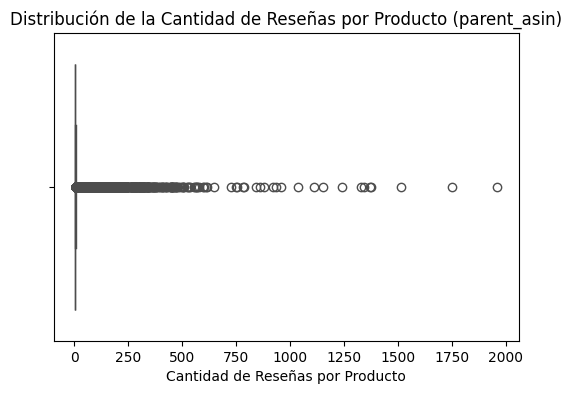

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Crear el boxplot de la cantidad de reseñas por 'parent_asin'
plt.figure(figsize=(6, 4))
sns.boxplot(x=reviews_per_product, color='blue')
plt.title('Distribución de la Cantidad de Reseñas por Producto (parent_asin)')
plt.xlabel('Cantidad de Reseñas por Producto')
plt.show()


In [67]:
df_date.columns

Index(['rating', 'title', 'text', 'parent_asin', 'user_id', 'timestamp',
       'helpful_vote', 'verified_purchase', 'text_length', 'sentiment'],
      dtype='object')

/tmp/ipykernel_171360/3709762816.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_reviews = df_date.resample('M', on='date').size()


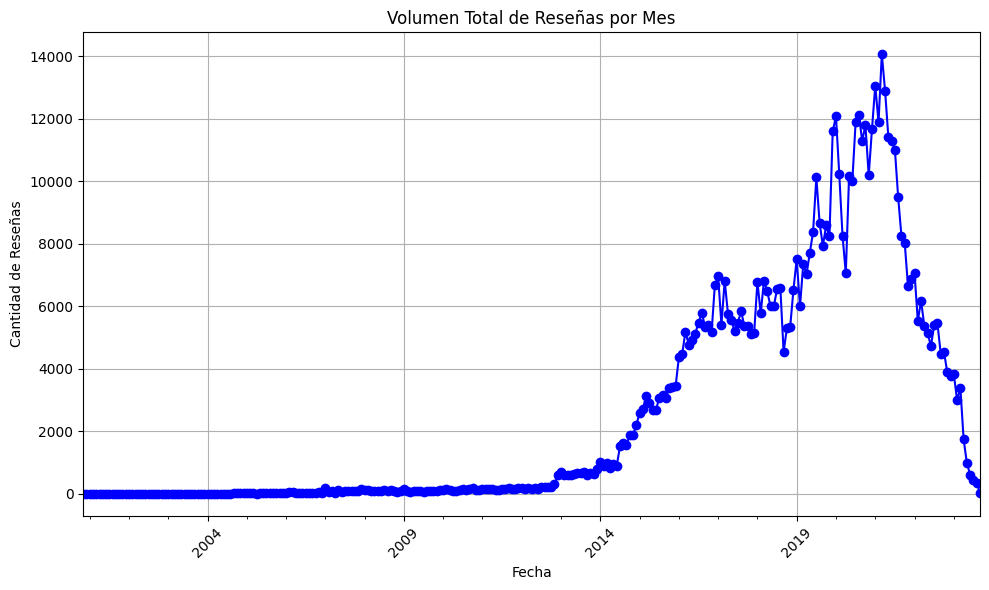

In [68]:
# Asegurarse de que la columna 'date' esté en formato datetime
df_date = df.copy()

df_date['date'] = pd.to_datetime(df_date['date'])

# # Establecer 'date' como el índice del DataFrame
# df_date.set_index('date', inplace=True)

# Agrupar por mes y contar el número de reseñas en cada mes
monthly_reviews = df_date.resample('M', on='date').size()

# Gráfico de líneas para el volumen de reseñas por mes
plt.figure(figsize=(10, 6))
monthly_reviews.plot(kind='line', marker='o', color='blue')
plt.title('Volumen Total de Reseñas por Mes')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Reseñas')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [70]:
# contamos el numero de reseñas previ al año 2013
reviews_before_2013 = df_date[df_date['date'] < '2013-01-01']
reviews_before_2013.shape[0]

10817